In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy import fft
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import os
import pickle

In [2]:
# assign directory
ROOT_DIR = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
data_dir = ROOT_DIR + 'Data/Panoptic Agriculture/Cleaned Dataset'
 
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(data_dir)

In [10]:
image = Image.open(file_list[0]).convert('L')
np.array(image).shape

(128, 128)

In [12]:
fft.fft2(image)

array([[846997.             -0.j        ,
         12179.77924034 -74850.25275459j,
         33642.08597878  -9664.33569439j, ...,
         41166.59294875 +44697.39934691j,
         33642.08597878  +9664.33569439j,
         12179.77924034 +74850.25275459j],
       [-80607.47337821-217337.11965129j,
        -49250.51735979 -45879.73269239j,
        -44420.71528053 -34456.88204092j, ...,
          1124.6449567  -13302.27201938j,
        -11268.65932703  -7045.15917801j,
        109474.24082666 -12272.05492509j],
       [  9258.40544768 -63605.07962912j,
        -12686.92919451 +18728.13629202j,
         25219.54460856 +21227.43459851j, ...,
         12632.07052143 -18279.52635988j,
         36597.64112753 -11586.02548986j,
        -33431.55544098 -26648.99299972j],
       ...,
       [  4181.76474323 +26692.89264377j,
         -2943.75825532 +15334.26554031j,
        -43482.57915565 +31406.63251613j, ...,
         16050.073444   -17986.75034109j,
        -17687.65582834 +11424.72521778j,

In [3]:
df = pd.DataFrame(columns=["Image ID", "Real", "Imaginary", "All"])

In [32]:
df

,Image ID,Real,Imaginary,All


In [40]:
for k in range(len(file_list)):
    image = Image.open(file_list[k]).convert('L')
    image = np.array(image)
   
    name = file_names[k].split(".")[0]
    transformed = fft.fft2(image)

    df.loc[len(df.index)] = [name, np.real(transformed), np.imag(transformed), transformed]


In [39]:
df


,Image ID,Real,Imaginary,All
0,test900,"[[846997.0, 12179.779240344444, 33642.08597878...","[[-0.0, -74850.25275458515, -9664.335694389747...","[[(846997-0j), (12179.779240344444-74850.25275..."
1,test1629,"[[1294260.0, 6514.627653313566, -30788.7840821...","[[-0.0, 61670.94641650138, -26543.14337519646,...","[[(1294260-0j), (6514.627653313566+61670.94641..."
2,test914,"[[977089.0, 17401.67292853853, -49274.17859590...","[[-0.0, -123017.71990867823, 4691.190327198949...","[[(977089-0j), (17401.67292853853-123017.71990..."
3,test1615,"[[1097897.0, 191693.28293203964, -62590.703782...","[[-0.0, -342765.4695055459, -117435.7578349266...","[[(1097897-0j), (191693.28293203964-342765.469..."
4,test1167,"[[1334392.0, 114714.06835309314, 26291.4163944...","[[-0.0, 2050.528813179857, 51359.91778495624, ...","[[(1334392-0j), (114714.06835309314+2050.52881..."
...,...,...,...,...
1585,test925,"[[887212.0, 10483.34536011034, -2699.986104018...","[[-0.0, -16649.733868356565, -2703.53562853724...","[[(887212-0j), (10483.34536011034-16649.733868..."
1586,test1624,"[[1584268.0, 154149.14739605892, 22004.9986169...","[[-0.0, 96858.47080581574, -14908.484944754866...","[[(1584268-0j), (154149.14739605892+96858.4708..."
1587,test1142,"[[726776.0, -15850.487262595709, -33123.455311...","[[-0.0, -42855.875248681536, -55114.2626368675...","[[(726776-0j), (-15850.487262595709-42855.8752..."
1588,test1156,"[[965653.0, 112169.69383174882, -35482.4895731...","[[-0.0, 28483.06228830715, -15883.716002464262...","[[(965653-0j), (112169.69383174882+28483.06228..."


In [43]:
def convert_to_fourier_basis(folder_dir,  normalized = True):
    file_list = [os.path.join(folder_dir, filename) for filename in os.listdir(folder_dir)]
    file_names = os.listdir(folder_dir)

    df = pd.DataFrame(columns=["Image ID", "Real", "Imaginary", "All"])
    
    
    #Fill DF DICT
    for k in range(len(file_list)):
        image = Image.open(file_list[k]).convert('L')
        image = np.array(image)
        if normalized:
            std= np.std(image)
            mean = np.mean(image)
            image = (image- mean)/std 
        name = file_names[k].split(".")[0]
        transformed = fft.fft2(image)

        df.loc[len(df.index)] = [name, np.real(transformed), np.imag(transformed), transformed]
    return df

In [76]:
converted = convert_to_fourier_basis(data_dir, normalized = True)

In [77]:
converted

,Image ID,Real,Imaginary,All
0,test900,"[[-7.105427357601002e-14, 334.7363253433343, 9...","[[-0.0, -2057.106131702027, -265.6045034468915...","[[(-7.105427357601002e-14-0j), (334.7363253433..."
1,test1629,"[[-7.105427357601002e-15, 147.44895859696302, ...","[[-0.0, 1395.8306305007404, -600.7647799443948...","[[(-7.105427357601002e-15-0j), (147.4489585969..."
2,test914,"[[6.927791673660977e-14, 353.8392196195491, -1...","[[-0.0, -2501.3970892693196, 95.38893940137173...","[[(6.927791673660977e-14-0j), (353.83921961954..."
3,test1615,"[[-9.237055564881302e-14, 3789.5611608727745, ...","[[-0.0, -6776.088815730927, -2321.573192247293...","[[(-9.237055564881302e-14-0j), (3789.561160872..."
4,test1167,"[[3.552713678800501e-14, 3490.094180566316, 79...","[[-0.0, 62.385885015729244, 1562.5890769029365...","[[(3.552713678800501e-14-0j), (3490.0941805663..."
...,...,...,...,...
1585,test925,"[[1.7763568394002505e-14, 366.75818606967425, ...","[[-0.0, -582.4883166910188, -94.58276809900133...","[[(1.7763568394002505e-14-0j), (366.7581860696..."
1586,test1624,"[[-2.842170943040401e-14, 3552.0866185693635, ...","[[-0.0, 2231.9272202035263, -343.5389087125141...","[[(-2.842170943040401e-14-0j), (3552.086618569..."
1587,test1142,"[[1.0658141036401503e-13, -665.4654510220405, ...","[[-0.0, -1799.2572643875815, -2313.91231296343...","[[(1.0658141036401503e-13-0j), (-665.465451022..."
1588,test1156,"[[1.9184653865522705e-13, 2975.763313151822, -...","[[-0.0, 755.6305888727693, -421.38101426534604...","[[(1.9184653865522705e-13-0j), (2975.763313151..."


In [78]:
layer = converted
layer["Flattened Data"] = layer["Real"].apply(lambda x: x.flatten())
layer

,Image ID,Real,Imaginary,All,Flattened Data
0,test900,"[[-7.105427357601002e-14, 334.7363253433343, 9...","[[-0.0, -2057.106131702027, -265.6045034468915...","[[(-7.105427357601002e-14-0j), (334.7363253433...","[-7.105427357601002e-14, 334.7363253433343, 92..."
1,test1629,"[[-7.105427357601002e-15, 147.44895859696302, ...","[[-0.0, 1395.8306305007404, -600.7647799443948...","[[(-7.105427357601002e-15-0j), (147.4489585969...","[-7.105427357601002e-15, 147.44895859696302, -..."
2,test914,"[[6.927791673660977e-14, 353.8392196195491, -1...","[[-0.0, -2501.3970892693196, 95.38893940137173...","[[(6.927791673660977e-14-0j), (353.83921961954...","[6.927791673660977e-14, 353.8392196195491, -10..."
3,test1615,"[[-9.237055564881302e-14, 3789.5611608727745, ...","[[-0.0, -6776.088815730927, -2321.573192247293...","[[(-9.237055564881302e-14-0j), (3789.561160872...","[-9.237055564881302e-14, 3789.5611608727745, -..."
4,test1167,"[[3.552713678800501e-14, 3490.094180566316, 79...","[[-0.0, 62.385885015729244, 1562.5890769029365...","[[(3.552713678800501e-14-0j), (3490.0941805663...","[3.552713678800501e-14, 3490.094180566316, 799..."
...,...,...,...,...,...
1585,test925,"[[1.7763568394002505e-14, 366.75818606967425, ...","[[-0.0, -582.4883166910188, -94.58276809900133...","[[(1.7763568394002505e-14-0j), (366.7581860696...","[1.7763568394002505e-14, 366.75818606967425, -..."
1586,test1624,"[[-2.842170943040401e-14, 3552.0866185693635, ...","[[-0.0, 2231.9272202035263, -343.5389087125141...","[[(-2.842170943040401e-14-0j), (3552.086618569...","[-2.842170943040401e-14, 3552.0866185693635, 5..."
1587,test1142,"[[1.0658141036401503e-13, -665.4654510220405, ...","[[-0.0, -1799.2572643875815, -2313.91231296343...","[[(1.0658141036401503e-13-0j), (-665.465451022...","[1.0658141036401503e-13, -665.4654510220405, -..."
1588,test1156,"[[1.9184653865522705e-13, 2975.763313151822, -...","[[-0.0, 755.6305888727693, -421.38101426534604...","[[(1.9184653865522705e-13-0j), (2975.763313151...","[1.9184653865522705e-13, 2975.763313151822, -9..."


In [79]:
flat = np.concatenate(layer["Flattened Data"].values.flatten())

<AxesSubplot:ylabel='Density'>

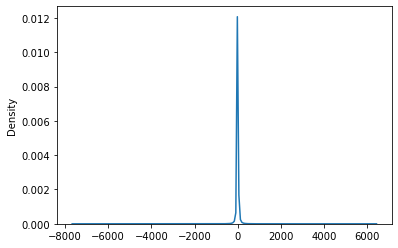

In [80]:
sns.kdeplot( x =flat , bw_method = 0.2)